In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def read_CBE_data(path, page=0):
    data = pd.read_excel(path, sheet_name=page)
    
    data = data[[
        "IP",
        "REGION",
        "DISTRICT",
        "COMMUNITY/CLASS",
        "TYPE OF OOSC",
        "SEX",
        "AGE",
        "DROP OUT (YES/NO)",
        "GRADUATED (YES/NO)",
        "TRANSITIONED (YES/NO)",
        "Language"]]
    
    data["DROP OUT (YES/NO)"] = data["DROP OUT (YES/NO)"].replace(["NO", "No"], "NO")
    data["DROP OUT (YES/NO)"] = data["DROP OUT (YES/NO)"].replace(["YES", "Yes"], "YES")
    
    data["GRADUATED (YES/NO)"] = data["GRADUATED (YES/NO)"].replace(["NO", "No"], "NO")
    data["GRADUATED (YES/NO)"] = data["GRADUATED (YES/NO)"].replace(["YES", "Yes"], "YES")
    
    data["TRANSITIONED (YES/NO)"] = data["TRANSITIONED (YES/NO)"].replace(["NO", "No"], "NO")
    data["TRANSITIONED (YES/NO)"] = data["TRANSITIONED (YES/NO)"].replace(["YES", "Yes"], "YES")
    
    return data

In [13]:
cycle_1 = read_CBE_data("../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 1 Learner Facilitator LC-SMC Training.xls", "Learner Data Template")
cycle_2 = read_CBE_data("../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 2 Learner Facilitator LC-SMC Training.xls", "Learner Data Template")
cycle_3 = read_CBE_data("../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 3 Learner Facilitator LC-SMC Training.xlsx", "Learner Data Template")
cycle_4 = read_CBE_data("../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/AfriKids CBE Cycle 4 Learner Facilitator LC-SMC Training.xls", "Learner Data Template")
cycle_5 = read_CBE_data("../shared_data_read_only/Data/AfriKids/InternalData/AfriKids_CBE_Data/Afrikids CBE Cycle 5  Learner Facilitator LC-SMC Training.xls")

In [14]:
all_results = pd.concat([cycle_1, cycle_2, cycle_3, cycle_4, cycle_5])

In [15]:
grouped = all_results.groupby(['REGION', 'DROP OUT (YES/NO)']).size().reset_index(name='counts')

pivot_table = grouped.pivot(index='REGION', columns='DROP OUT (YES/NO)', values='counts').fillna(0)

pivot_table['YES/NO Ratio'] = pivot_table['YES'] / pivot_table['NO']
pivot_table["Graduation Percentage"] = 100 - pivot_table['YES/NO Ratio'] * 100

print(pivot_table)

DROP OUT (YES/NO)     NO  YES  YES/NO Ratio  Graduation Percentage
REGION                                                            
Northern            4404   96      0.021798              97.820163
Upper East         11749  408      0.034726              96.527364


In [16]:
graduates = all_results[all_results["GRADUATED (YES/NO)"] == "YES"]

def compute_yes_percentage(series):
    yes_count = (series == 'YES').sum()
    total_count = series.notna().sum()
    percentage = (yes_count / total_count) * 100 if total_count > 0 else 0
    return percentage

graduated_percentages = all_results.groupby('REGION')['GRADUATED (YES/NO)'].apply(compute_yes_percentage)
transitioned_percentages = graduates.groupby('REGION')['TRANSITIONED (YES/NO)'].apply(compute_yes_percentage)

result = pd.DataFrame({
    'Graduated (%)': graduated_percentages,
    'Transitioned (%)': transitioned_percentages
})

In [17]:
result

,Graduated (%),Transitioned (%)
REGION,,
Northern,97.822222,99.660326
Upper East,96.306655,98.417518


In [18]:
result['Dropped out'] = 100 - result['Graduated (%)']
result["Graduated"] = (1 - result['Transitioned (%)'] / 100) * result['Graduated (%)']
result["Transitioned"] = (result['Transitioned (%)'] / 100) * result['Graduated (%)']

/tmp/ipykernel_131800/183277576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot.rename(columns={


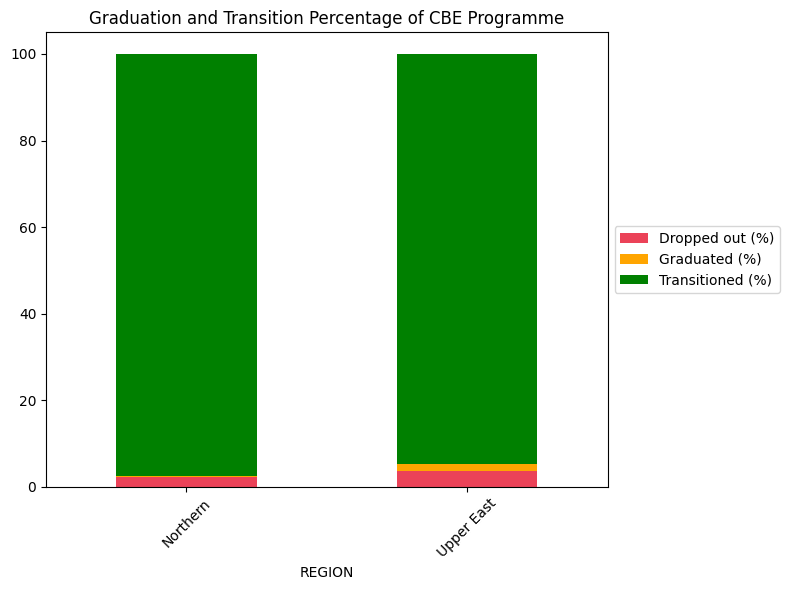

In [19]:
to_plot = result[["Dropped out", "Graduated", "Transitioned"]]
to_plot.rename(columns={
    "Dropped out": "Dropped out (%)",
    "Graduated": "Graduated (%)",
    "Transitioned": "Transitioned (%)"
}, inplace=True)

# Create a figure and axis to control the plot size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed

# Plot the data
to_plot.plot(kind="bar", stacked=True, color=['#eb4258', 'orange', 'green'], ax=ax)

# Set the title
ax.set_title("Graduation and Transition Percentage of CBE Programme")

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()

In [25]:
a = all_results.groupby(["REGION", "GRADUATED (YES/NO)"]).count()

In [26]:
a

IP  DISTRICT  COMMUNITY/CLASS  TYPE OF OOSC  \
REGION     GRADUATED (YES/NO)                                                   
Northern   NO                     98        98               98            66   
           YES                  4402      4402             4402          2933   
Upper East NO                    449       449              449            54   
           YES                 11708     11708            11708          4196   

                                 SEX    AGE  DROP OUT (YES/NO)  \
REGION     GRADUATED (YES/NO)                                    
Northern   NO                     98     98                 98   
           YES                  4402   4402               4402   
Upper East NO                    449    449                449   
           YES                 11708  11708              11708   

                               TRANSITIONED (YES/NO)  Language  
REGION     GRADUATED (YES/NO)                                   
Northern   NO                                     24         1  
           YES                                  2944        11  
Upper East NO                                    373         0  
           YES                                 10869        48